In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_arms = 10
mean = 0.5
stddev = 0.1
arms = np.random.normal(mean, stddev, size=num_arms)

In [ ]:
class EpsilonGreedyBandit:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)

    def select_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [ ]:
num_trials = 1000
epsilon = 0.1

bandit = EpsilonGreedyBandit(num_arms=num_arms, epsilon=epsilon)
rewards = []

for i in range(num_trials):
    action = bandit.select_action()
    reward = np.random.binomial(1, arms[action])
    bandit.update(action, reward)
    rewards.append(reward)
print("Q-values: ", bandit.q_values)

Q-values:  [0.6        0.52941176 0.65384615 0.5        0.25       0.56
 0.60989011 0.43478261 0.46666667 0.42857143]


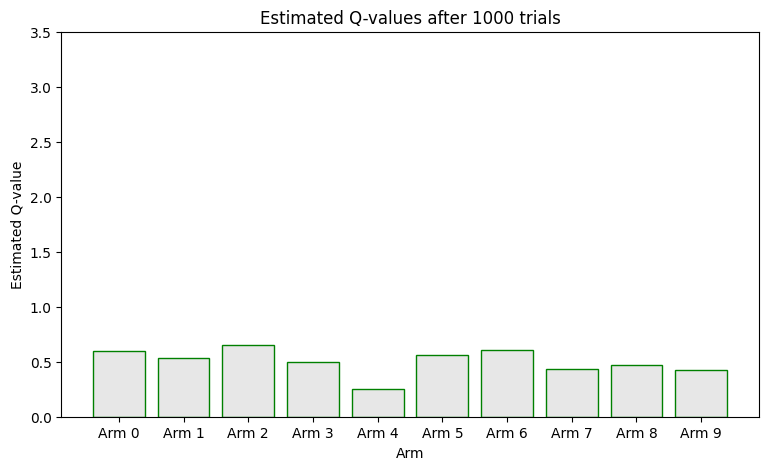

In [ ]:
# Plot the estimated Q-values
plt.figure(figsize=[9, 5])
plt.bar(range(num_arms), bandit.q_values, color=(0.1, 0.1, 0.1, 0.1), edgecolor='green')
plt.xlabel('Arm')
plt.ylabel('Estimated Q-value')
plt.xticks(range(num_arms), ['Arm {}'.format(i) for i in range(num_arms)])
plt.ylim(0, 3.5)
plt.title('Estimated Q-values after 1000 trials')
plt.show()

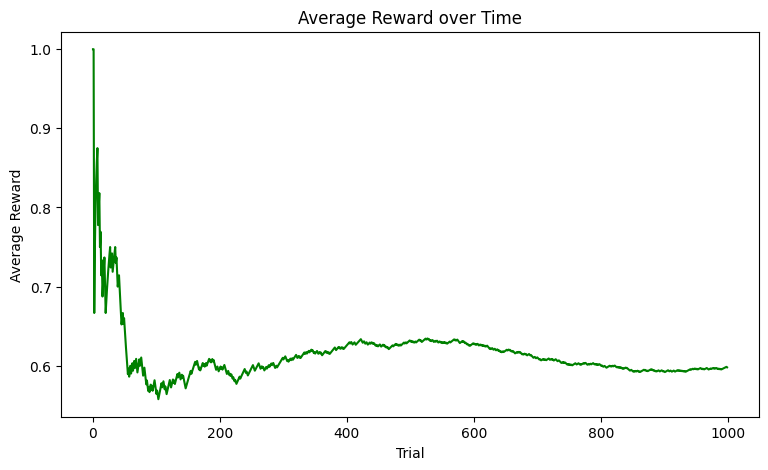

In [ ]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color = 'green')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.show()
